In [37]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
train_iris = pd\
    .read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv"
              , index_col=0)
test_iris = pd\
    .read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv"
              , index_col=0)

In [39]:
X_train = train_iris.drop(["species"], axis=1)
y_train = train_iris.species

X_test = test_iris.drop(["species"], axis=1)
y_test = test_iris.species

scores_data = pd.DataFrame(columns={"d", "test", "train"});

In [40]:
rs = np.random.seed(0)
max_depth_values = range(1,100)

In [41]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy',
                                      max_depth=max_depth,
                                      random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = \
    pd.DataFrame({'d': [max_depth],
                  'test': [test_score],
                  'train': [train_score]})
    scores_data = scores_data.append(temp_score_data, sort=True)

In [42]:
scores_data

,d,test,train
0,1,0.60,0.70
0,2,0.94,0.97
0,3,0.94,0.99
0,4,0.92,1.00
0,5,0.92,1.00
...,...,...,...
0,95,0.92,1.00
0,96,0.92,1.00
0,97,0.92,1.00
0,98,0.94,1.00


In [43]:
scores_data_long = pd.melt(scores_data,
                id_vars=['d'],
                value_vars=['train', 'test'],
                var_name='type',
                value_name='score')

<AxesSubplot:xlabel='d', ylabel='score'>

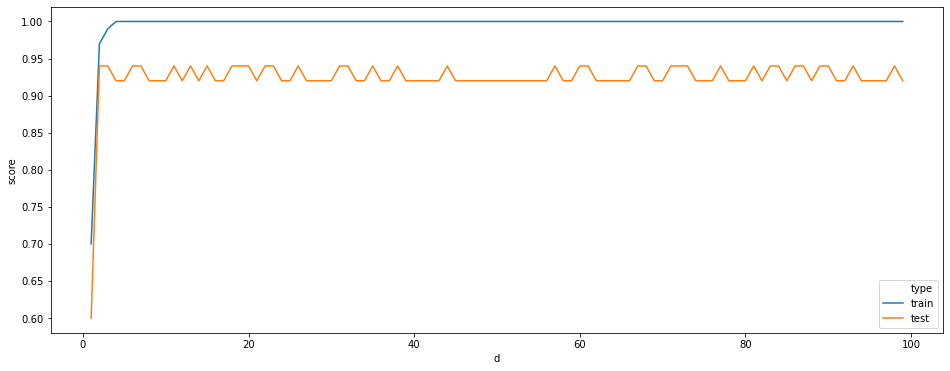

In [45]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="d", y="score", hue="type", data=scores_data_long)